## Import Data

In [1]:
# Library untuk melakukan data analysis dan data exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Library untuk membuat directory dan mengambil isinya
import os

# Library untuk import file dataset ke colab
from google.colab import files

# Library untuk unzip file dataset yang masih berupa zip
import zipfile

In [3]:
# Upload zip file dataset
uploaded = files.upload()

Saving Data A.zip to Data A.zip


In [4]:
# Unzip file dataset
with zipfile.ZipFile('Data A.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [5]:
# Import dataset
dataset = '/content/Data'

In [6]:
# Untuk menyimpan path dari masing-masing folder data train, data test, dan data validation
train_path = os.path.join(dataset, 'train')
test_path = os.path.join(dataset, 'test')
valid_path = os.path.join(dataset, 'valid')

In [7]:
# Untuk melihat apa saja label atau kelas yang dimiliki oleh dataset
label_train = os.listdir(train_path)
label_test = os.listdir(test_path)
label_valid = os.listdir(valid_path)

print("Train label : ", label_train)
print("Valid label : ", label_valid)
print("Test  label : ", label_test)

Train label :  ['no', 'yes']
Valid label :  ['no', 'yes']
Test  label :  ['no', 'yes']


In [8]:
# Untuk melihat berapa banyak image dalam label atau kelas pada data train, data test, dan data validation
print("Data Train")
for label in label_train:
  print(f"" + label + "\t: " + str(len(os.listdir(train_path+'/'+label))))

print("\nData Validation")
for label in label_valid:
  print(f"" + label + "\t: " + str(len(os.listdir(valid_path+'/'+label))))

print("\nData Test")
for label in label_test:
  print(f"" + label + "\t: " + str(len(os.listdir(test_path+'/'+label))))

Data Train
no	: 1400
yes	: 1400

Data Validation
no	: 100
yes	: 100

Data Test
no	: 3
yes	: 3


In [9]:
# Library untuk membuat visualisasi data dalam bentuk gambar
import matplotlib.image as pltimg

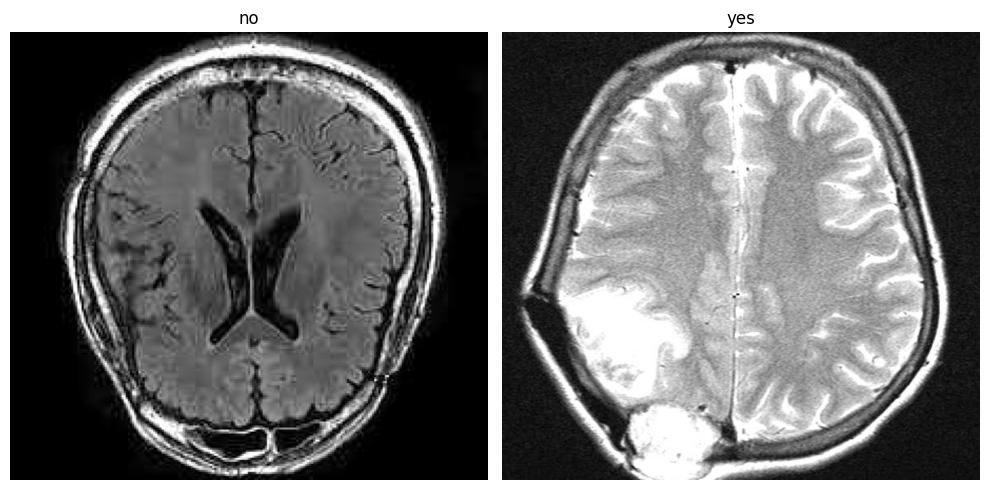

In [10]:
# Untuk melihat sampel gambar yang ada dari masing-masing label pada data train
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 5))
axs = axs.flatten()

for i, label in enumerate(label_train):
    label_dir = os.listdir(train_path + '/' + label)
    image_path = os.path.join(train_path, label, label_dir[27])

    img = pltimg.imread(image_path)

    axs[i].imshow(img, aspect='auto')
    axs[i].set_title(label)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

## Data Augmentation

In [11]:
# Library untuk melakukan data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
# Untuk mengatur parameter yang diperlukan pada saat men-generate gambar
train_generator = ImageDataGenerator(
    samplewise_center = True,
    rotation_range = 30,
    brightness_range = (0.8, 1.2),
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    rescale = 1.0/255
)

valid_generator = ImageDataGenerator(
    rescale = 1.0/255
)

test_generator = ImageDataGenerator(
    rescale = 1.0/255
)

Sebelum masuk ke pemodelan, gambar harus diproses terlebih dahulu menggunakan ImageDataGenerator dari TensorFlow. Semua gambar akan dinormalisasi kemudian dirotasi sebanyak 30 derajat dengan rentang tingkat kecerahan 0.8 - 1.2 sesuai standar. Selain itu, gambar akan digeser dan dizoom sebesar 0.2 lalu melakukan rescalling piksel dibagi dengan 255. Gambar juga akan diflip secara horizontal dan vertikal untuk menciptakan variasi baru yang diharapkan dapat meningkatkan performa model.

In [13]:
# Untuk melakukan data augmentasi
data_train = train_generator.flow_from_directory(train_path,
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical',
                                                shuffle = True)

data_valid = valid_generator.flow_from_directory(valid_path,
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical',
                                                shuffle = True)

data_test = test_generator.flow_from_directory(test_path,
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical',
                                                shuffle = False)

Found 2800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


Pada ketiga data (train, test, valid), saya menentukan target size menjadi 224 x 224 menyesuaikan dengan arsitektur yang ada di soal. Kemudian jumlah gambar yang dibaca dalam satu batch selama pelatihan adalah 32, dan gambar tiap epoch akan diacak KECUALI pada data test.

## Create an Architecture

In [14]:
# Library untuk membuat architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras import models
from tensorflow.keras import layers

In [15]:
# Untuk membuat architecture serta menyusun input, hidden, dan output layer
model = models.Sequential()

model.add(layers.Conv2D(96, (11, 11), strides = (4, 4), activation = 'relu', input_shape = (224, 224, 3)))

model.add(layers.MaxPooling2D((3, 3), strides = (2, 2)))
model.add(layers.Conv2D(256, (5, 5), padding = "valid", activation = 'relu'))
model.add(layers.MaxPooling2D((3, 3), strides = (2, 2)))
model.add(layers.Conv2D(384, (3, 3), padding = "same", activation = 'relu'))
model.add(layers.Conv2D(384, (3, 3), padding = "same", activation = 'relu'))
model.add(layers.Conv2D(256, (3, 3), padding = "same", activation = 'relu'))
model.add(layers.MaxPooling2D((3, 3), strides = (2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation = 'relu'))
model.add(layers.Dense(4096, activation = 'relu'))

model.add(layers.Dense(2, activation = 'softmax'))

In [16]:
# Untuk menampilkan summary model atau arsitektur yang telah dibuat
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 384)       1

Dari architecture di atas, terdapat 5 layer Conv2D, 3 layer MaxPooling2D, 1 layer Flatten dan 3 fully connected layer. Total params diperolah dari jumlah parameter dari masing-masing model. Nilai non-trainable params nya 0 menandakan bahwa selama pelatihan tidak ada model atau layer yang difreeze.

In [17]:
# Untuk mengcompile model
model.compile(optimizer = 'SGD',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

Parameter yang digunakan pada saat mengompile model antara lain adalah optimizer "SGD" karena memberikan performa yang lebih baik, kemudian loss "CategoricalCrossentropy" karena ada dua kelas yang ingin diprediksi dan mengikuti activation function softmax, serta yang terakhir metrics "Accuracy" untuk menampilkan accuracy yang diperoleh.

In [18]:
history = model.fit(data_train,
                    epochs = 15,
                    validation_data = data_valid)

Epoch 1/15
88/88 [==============================] - 52s 458ms/step - loss: 0.6895 - accuracy: 0.5879 - val_loss: 0.6856 - val_accuracy: 0.6650
Epoch 2/15
88/88 [==============================] - 41s 460ms/step - loss: 0.6788 - accuracy: 0.6111 - val_loss: 0.6888 - val_accuracy: 0.5250
Epoch 3/15
88/88 [==============================] - 41s 471ms/step - loss: 0.6595 - accuracy: 0.6511 - val_loss: 0.6505 - val_accuracy: 0.6500
Epoch 4/15
88/88 [==============================] - 41s 465ms/step - loss: 0.6162 - accuracy: 0.6846 - val_loss: 0.6283 - val_accuracy: 0.6650
Epoch 5/15
88/88 [==============================] - 40s 459ms/step - loss: 0.5795 - accuracy: 0.6964 - val_loss: 0.6337 - val_accuracy: 0.6700
Epoch 6/15
88/88 [==============================] - 42s 475ms/step - loss: 0.5497 - accuracy: 0.7389 - val_loss: 0.6104 - val_accuracy: 0.6950
Epoch 7/15
88/88 [==============================] - 40s 454ms/step - loss: 0.5214 - accuracy: 0.7446 - val_loss: 0.5872 - val_accuracy: 0.7150

In [20]:
# Untuk menyimpan history dari training model yang sebelumnya telah dilakukan
hist_dict = history.history
train_loss = hist_dict["loss"]
val_loss = hist_dict["val_loss"]
train_acc = hist_dict["accuracy"]
val_acc = hist_dict["val_accuracy"]

In [21]:
# Untuk menyimpan range epoch dari training model sebelumnya
epochs_loss = range(1, len(train_loss)+1)
epochs_acc = range(1, len(train_acc)+1)

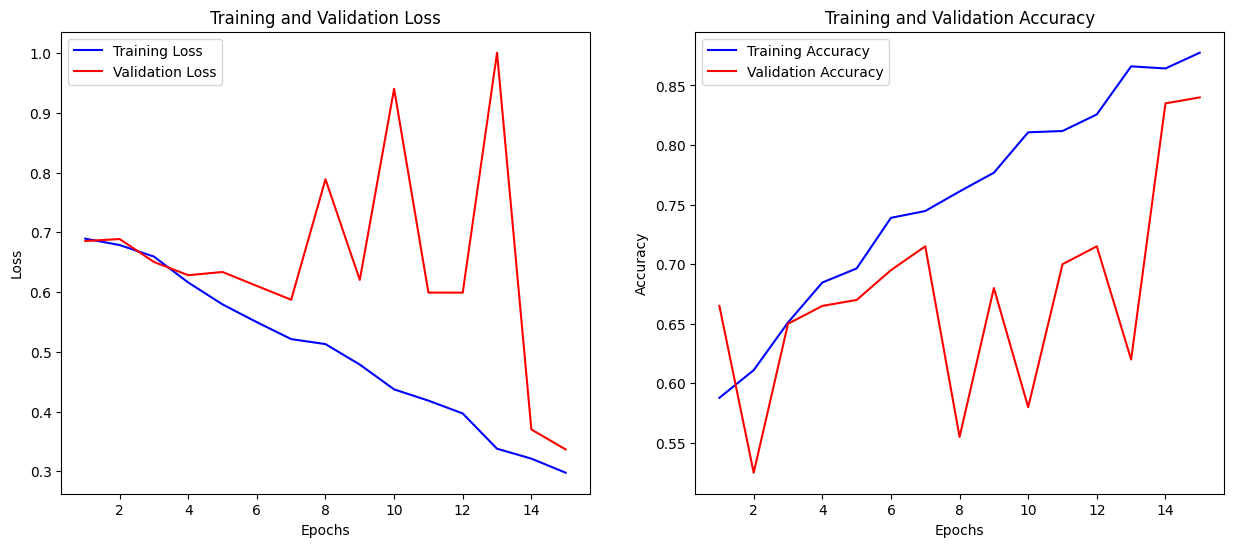

In [22]:
# Untuk membuat plot training dan validation loss serta training dan validation accuracy
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(epochs_loss, train_loss, 'b-', label="Training Loss")
axs[0].plot(epochs_loss, val_loss, 'r-', label="Validation Loss")
axs[0].set_title("Training and Validation Loss")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(epochs_acc, train_acc, 'b-', label="Training Accuracy")
axs[1].plot(epochs_acc, val_acc, 'r-', label="Validation Accuracy")
axs[1].set_title("Training and Validation Accuracy")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].legend()

plt.show()

Setelah ditrain sebanyak 15 epoch, diperoleh hasil train accuracy nya sebesar 0.8775 dan val accuracy nya sebesar 0.8400. Sementara itu, diperoleh hasil train loss nya sebesar 0.2978 dan val loss nya sebesar 0.3367.

Kedua nilai loss yang diperoleh memang memiliki perbedaan yang tidak terlalu signifikan. Namun, nilai train accuracy berada di atas nilai val accuracy. Artinya, terdapat indikasi overfitting dan model masih kurang baik dalam memprediksi data, baik dari data training maupun data baru.

In [23]:
test_loss, test_accuracy = model.evaluate(data_test)
print("Model")
print("Test loss : ", test_loss)
print("Test accuracy : ", test_accuracy)

1/1 [==============================] - 0s 308ms/step - loss: 0.0911 - accuracy: 1.0000
Model
Test loss :  0.09109548479318619
Test accuracy :  1.0


Setelah mencoba memprediksi menggunakan model1 dan data testing, diperoleh nilai test accuracy nya sebesar 1 dan nilai test loss nya sebesar 0.09. Hal ini berarti model sangat baik dalam memprediksi.

## Modify the Architecture

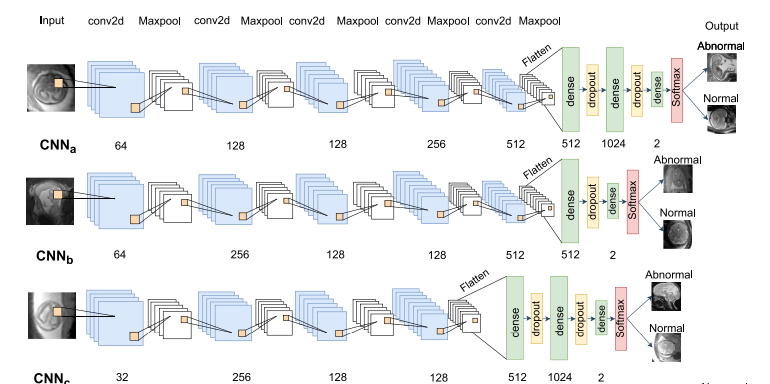

### Percobaan ke-1

In [24]:
# Untuk membuat architecture serta menyusun input, hidden, dan output layer
model1 = models.Sequential()

model1.add(layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (224, 224, 3)))
model1.add(layers.MaxPooling2D((3, 3)))
model1.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model1.add(layers.MaxPooling2D((3, 3)))
model1.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model1.add(layers.MaxPooling2D((3, 3)))
model1.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
model1.add(layers.MaxPooling2D((3, 3)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation = 'relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(1024, activation = 'relu'))
model1.add(layers.Dropout(0.5))

model1.add(layers.Dense(2, activation = 'softmax'))

Setelah melihat dari paper yang melakukan penelitian mengenai klasifikasi gambar menggunakan model CNN berjudul "StackFBAs: Detection of fetal brain abnormalities using CNN with
stacking strategy from MRI images", saya menggunakan 5 jenis layer, yaitu Conv2D, MaxPool2D, Flatten, Dropout dan Dense.

Pada input layer, saya menggunakan Conv2D untuk melakukan ekstrasi fitur dari gambar. Layer ini menggunakan 64 neuron, kernel size berukuran (3,3), dan input shape yang telah disesuaikan dengan target size sebelumnya, yaitu 224 x 224 dan 3 RGB. Aktivasi yang saya gunakan adalah ReLU untuk memberikan performa yang lebih cepat.

Pada hidden layer, saya menggunakan MaxPool2D untuk mengurangi dimensi spasial pada output konvolusi dengan kernel size berukuran (3, 3). Selanjutnya saya menambahkan layer Conv2D dan MaxPool2D.

Selain Conv2D dan MaxPool2D, saya juga menggunakan Flatten untuk mengubah layer berdimensi 2D menjadi 1D agar dapat diproses oleh layer Dense. Selanjutnya, saya menggunakan layer Dense dan menggunakan fungsi aktivasi ReLU.

Setelah masuk ke layer Dense yang pertama, saya menggunakan Dropout untuk mencegah terjadinya overfitting dengan ketentuan menonaktifkan setengah dari neuron selama pelatihan.

Terakhir, pada output layer, saya menggunakan Dense untuk menghasilkan output klasifikasi dengan jumlah unit sebanyak output label dari dataset, yaitu 2 dan menggunakan aktivasi softmax untuk melakukan klasifikasi multilabel.


In [25]:
# Untuk menampilkan summary model atau arsitektur yang telah dibuat
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 22, 22, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 128)        

Dari architecture di atas, terdapat 4 layer Conv2D, 4 layer MaxPooling2D, 1 layer Flatten, 3 fully connected layer, dan 2 layer Dropout. Total params diperolah dari jumlah parameter dari masing-masing model. Nilai non-trainable params nya 0 menandakan bahwa selama pelatihan tidak ada model atau layer yang difreeze.

In [26]:
# Library untuk menggunakan optimizer Adam
from tensorflow.keras.optimizers import Adam

In [27]:
# Untuk mengatur parameter pada optimizer yang digunakan
optimizer = Adam(learning_rate = 0.001)

Disini saya menggunakan optimizer Adam dengan learning rate menggunakan nilai defaultnya, yaitu 0.001.

In [28]:
# Untuk mengcompile model
model1.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

Parameter yang digunakan pada saat mengompile model antara lain adalah optimizer "Adam" karena memberikan performa yang lebih baik, kemudian loss "CategoricalCrossentropy" karena ada dua kelas (yes & no) dan mengikuti activation function softmax, serta yang terakhir metrics "Accuracy" untuk menampilkan accuracy yang diperoleh.

In [29]:
history1 = model1.fit(data_train,
                    epochs = 15,
                    validation_data = data_valid)

Epoch 1/15
88/88 [==============================] - 46s 456ms/step - loss: 0.5874 - accuracy: 0.6611 - val_loss: 1.0058 - val_accuracy: 0.5000
Epoch 2/15
88/88 [==============================] - 41s 463ms/step - loss: 0.5015 - accuracy: 0.7682 - val_loss: 0.6078 - val_accuracy: 0.5900
Epoch 3/15
88/88 [==============================] - 40s 453ms/step - loss: 0.4566 - accuracy: 0.7989 - val_loss: 0.5731 - val_accuracy: 0.6750
Epoch 4/15
88/88 [==============================] - 40s 459ms/step - loss: 0.3695 - accuracy: 0.8468 - val_loss: 0.5600 - val_accuracy: 0.7200
Epoch 5/15
88/88 [==============================] - 40s 455ms/step - loss: 0.3389 - accuracy: 0.8561 - val_loss: 0.5221 - val_accuracy: 0.7550
Epoch 6/15
88/88 [==============================] - 40s 454ms/step - loss: 0.3307 - accuracy: 0.8546 - val_loss: 1.2777 - val_accuracy: 0.5350
Epoch 7/15
88/88 [==============================] - 43s 492ms/step - loss: 0.2821 - accuracy: 0.8904 - val_loss: 0.8255 - val_accuracy: 0.6650

Setelah ditrain sebanyak 15 epoch, diperoleh hasil train accuracy nya sebesar 0.9593 dan val accuracy nya sebesar 0.8065. Sementara itu, diperoleh hasil train loss nya sebesar 0.1100 dan val loss nya sebesar 1.0369.

Kedua nilai loss yang diperoleh memiliki perbedaan sangat signifikan, begitupula dengan kedua nilai accuracy. Artinya, terdapat indikasi overfitting dan model masih kurang baik dalam memprediksi data, baik dari data training maupun data baru.


In [30]:
test_loss1, test_accuracy1 = model1.evaluate(data_test)
print("Model 1")
print("Test loss : ", test_loss1)
print("Test accuracy : ", test_accuracy1)

1/1 [==============================] - 0s 342ms/step - loss: 0.0619 - accuracy: 1.0000
Model 1
Test loss :  0.06185724213719368
Test accuracy :  1.0


Setelah mencoba memprediksi menggunakan model1 dan data testing, diperoleh nilai test accuracy nya sebesar 1 dan nilai test loss nya sebesar 0.06. Hal ini berarti model sangat baik dalam memprediksi.

### Percobaan ke-2

In [32]:
# Untuk membuat architecture serta menyusun input, hidden, dan output layer
model2 = models.Sequential()

model2.add(layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (224, 224, 3)))
model2.add(layers.MaxPooling2D((3, 3)))
model2.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
model2.add(layers.MaxPooling2D((3, 3)))
model2.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model2.add(layers.MaxPooling2D((3, 3)))
model2.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model2.add(layers.MaxPooling2D((3, 3)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation = 'relu'))
model2.add(layers.Dropout(0.5))

model2.add(layers.Dense(2, activation = 'softmax'))

Setelah melihat dari paper yang melakukan penelitian mengenai klasifikasi gambar menggunakan model CNN berjudul "StackFBAs: Detection of fetal brain abnormalities using CNN with
stacking strategy from MRI images", saya menggunakan 5 jenis layer, yaitu Conv2D, MaxPool2D, Flatten, Dropout dan Dense.

Pada input layer, saya menggunakan Conv2D untuk melakukan ekstrasi fitur dari gambar. Layer ini menggunakan 64 neuron, kernel size berukuran (3,3), dan input shape yang telah disesuaikan dengan target size sebelumnya, yaitu 224 x 224 dan 3 RGB. Aktivasi yang saya gunakan adalah ReLU untuk memberikan performa yang lebih cepat.

Pada hidden layer, saya menggunakan MaxPool2D untuk mengurangi dimensi spasial pada output konvolusi dengan kernel size berukuran (3, 3). Selanjutnya saya menambahkan layer Conv2D dan MaxPool2D.

Selain Conv2D dan MaxPool2D, saya juga menggunakan Flatten untuk mengubah layer berdimensi 2D menjadi 1D agar dapat diproses oleh layer Dense. Selanjutnya, saya menggunakan layer Dense dan menggunakan fungsi aktivasi ReLU.

Setelah masuk ke layer Dense yang pertama, saya menggunakan Dropout untuk mencegah terjadinya overfitting dengan ketentuan menonaktifkan setengah dari neuron selama pelatihan.

Terakhir, pada output layer, saya menggunakan Dense untuk menghasilkan output klasifikasi dengan jumlah unit sebanyak output label dari dataset, yaitu 2 dan menggunakan aktivasi softmax untuk melakukan klasifikasi multilabel.

In [33]:
# Untuk menampilkan summary model atau arsitektur yang telah dibuat
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 72, 72, 256)       147712    
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 24, 24, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 22, 22, 128)       295040    
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 7, 7, 128)        

Dari architecture di atas, terdapat 4 layer Conv2D, 4 layer MaxPooling2D, 1 layer Flatten, 2 fully connected layer, dan 1 layer Dropout. Total params diperolah dari jumlah parameter dari masing-masing model. Nilai non-trainable params nya 0 menandakan bahwa selama pelatihan tidak ada model atau layer yang difreeze.

In [34]:
# Untuk mengatur parameter pada optimizer yang digunakan
optimizer = Adam(learning_rate = 0.001)

Disini saya menggunakan optimizer Adam dengan learning rate menggunakan nilai defaultnya, yaitu 0.001.

In [35]:
# Untuk mengcompile model
model2.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

Parameter yang digunakan pada saat mengompile model antara lain adalah optimizer "Adam" karena memberikan performa yang lebih baik, kemudian loss "CategoricalCrossentropy" karena ada dua kelas (yes & no) dan mengikuti activation function softmax, serta yang terakhir metrics "Accuracy" untuk menampilkan accuracy yang diperoleh.

In [36]:
history2 = model2.fit(data_train,
                    epochs = 20,
                    validation_data = data_valid)

Epoch 1/20
88/88 [==============================] - 51s 519ms/step - loss: 0.5902 - accuracy: 0.6818 - val_loss: 0.6534 - val_accuracy: 0.5000
Epoch 2/20
88/88 [==============================] - 46s 526ms/step - loss: 0.4632 - accuracy: 0.7811 - val_loss: 0.6656 - val_accuracy: 0.5550
Epoch 3/20
88/88 [==============================] - 46s 526ms/step - loss: 0.4406 - accuracy: 0.8071 - val_loss: 0.5229 - val_accuracy: 0.7500
Epoch 4/20
88/88 [==============================] - 45s 512ms/step - loss: 0.3746 - accuracy: 0.8421 - val_loss: 0.6336 - val_accuracy: 0.6900
Epoch 5/20
88/88 [==============================] - 46s 523ms/step - loss: 0.3428 - accuracy: 0.8586 - val_loss: 0.5651 - val_accuracy: 0.7050
Epoch 6/20
88/88 [==============================] - 45s 516ms/step - loss: 0.2926 - accuracy: 0.8804 - val_loss: 0.6790 - val_accuracy: 0.7300
Epoch 7/20
88/88 [==============================] - 44s 504ms/step - loss: 0.2390 - accuracy: 0.9082 - val_loss: 0.6137 - val_accuracy: 0.6750

Setelah ditrain sebanyak 20 epoch, diperoleh hasil train accuracy nya sebesar 0.9711 dan val accuracy nya sebesar 0.8300. Sementara itu, diperoleh hasil train loss nya sebesar 0.0822 dan val loss nya sebesar 0.4805.

Kedua nilai loss yang diperoleh memiliki perbedaan sangat signifikan, begitupula dengan kedua nilai accuracy. Artinya, terdapat indikasi overfitting dan model masih kurang baik dalam memprediksi data, baik dari data training maupun data baru.


In [37]:
test_loss2, test_accuracy2 = model2.evaluate(data_test)
print("Model 2")
print("Test loss : ", test_loss2)
print("Test accuracy : ", test_accuracy2)

1/1 [==============================] - 0s 309ms/step - loss: 0.0094 - accuracy: 1.0000
Model 2
Test loss :  0.00935546588152647
Test accuracy :  1.0


Setelah mencoba memprediksi menggunakan model2 dan data testing, diperoleh nilai test accuracy nya sebesar 1 dan nilai test loss nya sebesar 0.009. Hal ini berarti model sangat baik dalam memprediksi.

### Percobaan ke-3

In [54]:
# Untuk membuat architecture serta menyusun input, hidden, dan output layer
model3 = models.Sequential()

model3.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (224, 224, 3)))
model3.add(layers.MaxPooling2D((3, 3)))
model3.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
model3.add(layers.MaxPooling2D((3, 3)))
model3.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model3.add(layers.MaxPooling2D((3, 3)))
model3.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model3.add(layers.MaxPooling2D((3, 3)))
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation = 'relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(1024, activation = 'relu'))

model3.add(layers.Dense(2, activation = 'softmax'))

Setelah melihat dari paper yang melakukan penelitian mengenai klasifikasi gambar menggunakan model CNN berjudul "StackFBAs: Detection of fetal brain abnormalities using CNN with stacking strategy from MRI images", saya menggunakan 5 jenis layer, yaitu Conv2D, MaxPool2D, Flatten, Dropout dan Dense.

Pada input layer, saya menggunakan Conv2D untuk melakukan ekstrasi fitur dari gambar. Layer ini menggunakan 32 neuron, kernel size berukuran (3,3), dan input shape yang telah disesuaikan dengan target size sebelumnya, yaitu 224 x 224 dan 3 RGB. Aktivasi yang saya gunakan adalah ReLU untuk memberikan performa yang lebih cepat.

Pada hidden layer, saya menggunakan MaxPool2D untuk mengurangi dimensi spasial pada output konvolusi dengan kernel size berukuran (3, 3). Selanjutnya saya menambahkan layer Conv2D dan MaxPool2D.

Selain Conv2D dan MaxPool2D, saya juga menggunakan Flatten untuk mengubah layer berdimensi 2D menjadi 1D agar dapat diproses oleh layer Dense. Selanjutnya, saya menggunakan layer Dense dan menggunakan fungsi aktivasi ReLU.

Setelah masuk ke layer Dense yang pertama, saya menggunakan Dropout untuk mencegah terjadinya overfitting dengan ketentuan menonaktifkan setengah dari neuron selama pelatihan.

Terakhir, pada output layer, saya menggunakan Dense untuk menghasilkan output klasifikasi dengan jumlah unit sebanyak output label dari dataset, yaitu 2 dan menggunakan aktivasi softmax untuk melakukan klasifikasi multilabel.

In [55]:
# Untuk menampilkan summary model atau arsitektur yang telah dibuat
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 72, 72, 256)       73984     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 24, 24, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 22, 22, 128)       295040    
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 7, 7, 128)        

Dari architecture di atas, terdapat 4 layer Conv2D, 4 layer MaxPooling2D, 1 layer Flatten, 3 fully connected layer, dan 1 layer Dropout. Total params diperolah dari jumlah parameter dari masing-masing model. Nilai non-trainable params nya 0 menandakan bahwa selama pelatihan tidak ada model atau layer yang difreeze.

In [56]:
# Untuk mengatur parameter pada optimizer yang digunakan
optimizer = Adam(learning_rate = 0.001)

Disini saya menggunakan optimizer Adam dengan learning rate menggunakan nilai defaultnya, yaitu 0.001.

In [57]:
# Untuk mengcompile model
model3.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

Parameter yang digunakan pada saat mengompile model antara lain adalah optimizer "Adam" karena memberikan performa yang lebih baik, kemudian loss "CategoricalCrossentropy" karena ada dua kelas (yes & no) dan mengikuti activation function softmax, serta yang terakhir metrics "Accuracy" untuk menampilkan accuracy yang diperoleh.

In [58]:
history3 = model3.fit(data_train,
                    batch_size = 32,
                    epochs = 20,
                    validation_data = data_valid)

Epoch 1/20
88/88 [==============================] - 41s 443ms/step - loss: 0.5743 - accuracy: 0.6886 - val_loss: 0.7579 - val_accuracy: 0.5000
Epoch 2/20
88/88 [==============================] - 39s 445ms/step - loss: 0.4809 - accuracy: 0.7725 - val_loss: 0.5654 - val_accuracy: 0.6600
Epoch 3/20
88/88 [==============================] - 39s 444ms/step - loss: 0.4402 - accuracy: 0.8086 - val_loss: 0.7527 - val_accuracy: 0.5250
Epoch 4/20
88/88 [==============================] - 39s 439ms/step - loss: 0.3901 - accuracy: 0.8375 - val_loss: 0.8914 - val_accuracy: 0.5050
Epoch 5/20
88/88 [==============================] - 39s 440ms/step - loss: 0.3630 - accuracy: 0.8493 - val_loss: 0.5271 - val_accuracy: 0.7400
Epoch 6/20
88/88 [==============================] - 40s 455ms/step - loss: 0.2954 - accuracy: 0.8836 - val_loss: 0.6643 - val_accuracy: 0.7100
Epoch 7/20
88/88 [==============================] - 39s 440ms/step - loss: 0.2515 - accuracy: 0.9036 - val_loss: 0.7216 - val_accuracy: 0.6800

In [59]:
test_loss3, test_accuracy3 = model3.evaluate(data_test)
print("Model 3")
print("Test loss : ", test_loss3)
print("Test accuracy : ", test_accuracy3)

1/1 [==============================] - 0s 67ms/step - loss: 0.0686 - accuracy: 1.0000
Model 3
Test loss :  0.06863853335380554
Test accuracy :  1.0


Setelah mencoba memprediksi menggunakan model3 dan data testing, diperoleh nilai test accuracy nya sebesar 1 dan nilai test loss nya sebesar 0.06. Hal ini berarti model sangat baik dalam memprediksi.

## Evaluate the Latest Architecture

In [44]:
# Library untuk membuat classification report dan confusion matrix pada hasil prediksi
from sklearn.metrics import confusion_matrix, classification_report

### Benchmark Model

In [61]:
# Untuk melakukan prediksi menggunakan training model sebelumnya
predict = model.predict(data_test)
y_classes = predict.argmax(axis = -1)
y_classes

1/1 [==============================] - 0s 247ms/step


array([0, 0, 0, 1, 1, 1])

In [62]:
# Untuk menampilkan hasil prediksi menggunakan classification report
print(classification_report(data_test.classes, y_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



Dari classification report, terlihat hasil accuracy yang diperoleh secara keseluruhan dalam memprediksi menggunakan model benchmark yang sebelumnya telah ditraining sangat tinggi, yaitu 100%.
1.   Kategori No  ->
Kategori ini memiliki precision score sebesar 100%, yang artinya dari seluruh gambar yang diprediksi merupakan No, 100% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 100%, yang artinya model berhasil memprediksi benar sebesar 100% dari semua gambar No. Model ini juga memiliki f1-score yang lumayan tinggi, yaitu sebesar 100%.
2.   Kategori Yes ->
Kategori ini memiliki precision score sebesar 100%, yang artinya dari seluruh gambar yang diprediksi merupakan Yes, 100% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 100%, yang artinya model berhasil memprediksi benar sebesar 100% dari semua gambar Yes. Model ini juga memiliki f1-score yang sangat tinggi, yaitu sebesar 100%.

### Best Model

In [47]:
# Untuk melakukan prediksi menggunakan training model sebelumnya
predict = model2.predict(data_test)
y_classes = predict.argmax(axis = -1)
y_classes

1/1 [==============================] - 0s 132ms/step


array([0, 0, 0, 1, 1, 1])

In [48]:
# Untuk menampilkan hasil prediksi menggunakan classification report
print(classification_report(data_test.classes, y_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



Dari classification report, terlihat hasil accuracy yang diperoleh secara keseluruhan dalam memprediksi menggunakan model2 yang sebelumnya telah ditraining sangat tinggi, yaitu 100%.
1.   Kategori No  ->
Kategori ini memiliki precision score sebesar 100%, yang artinya dari seluruh gambar yang diprediksi merupakan No, 100% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 100%, yang artinya model berhasil memprediksi benar sebesar 100% dari semua gambar No. Model ini juga memiliki f1-score yang lumayan tinggi, yaitu sebesar 100%.
2.   Kategori Yes ->
Kategori ini memiliki precision score sebesar 100%, yang artinya dari seluruh gambar yang diprediksi merupakan Yes, 100% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 100%, yang artinya model berhasil memprediksi benar sebesar 100% dari semua gambar Yes. Model ini juga memiliki f1-score yang sangat tinggi, yaitu sebesar 100%.

# Kesimpulan

Setelah melakukan evaluasi dan perbandingan terhadap model benchmark dan model yang telah dimodifikasi, ada beberapa hal yang dapat disimpulkan.
1. Model benchmark yang awalnya overfitting masih belum berhasil diselesaikan dengan model yang telah dimodifikasi.
2. Model benchmark memiliki accuracy yang sangat tinggi secara keseluruhan ketika diuji menggunakan data testing, begitu juga model yang telah dimodifikasi memiliki accuracy yang sangat tinggi secara keseluruhan ketika diuji menggunakan data testing.
4. Meskipun accuracy yang dihasilkan sangat tinggi, tetapi masih perlu dilakukan evaluasi dan perbaikan model dalam memprediksi karena model tersebut masih overfitting dan dapat menyebabkan kurang akurat dalam memprediksi data baru yang jumlah nya lebih banyak.

## Referensi

Carremans, B. (2018, August 23). Handling overfitting in deep learning models. Medium. https://towardsdatascience.com/handling-overfitting-in-deep-learning-models-c760ee047c6e#:~:text=Overfitting%20occurs%20when%20you%20achieve,are%20irrelevant%20in%20other%20data.

Chowdhury, A., dkk. (2023, July 18). Stackfbas: Detection of fetal brain abnormalities using CNN with stacking strategy from MRI images. Journal of King Saud University - Computer and Information Sciences. https://www.sciencedirect.com/science/article/pii/S131915782300201X/pdfft?md5=d91109d2a5fa355c715a3f5be71035f0&pid=1-s2.0-S131915782300201X-main.pdf

Prabhu. (2018, March 4). Understanding of Convolutional Neural Network (CNN) — Deep Learning. Medium. https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148

Uzila, A. (2022, August 23). 5 Popular CNN Architectures Clearly Explained and Visualized. Medium. https://towardsdatascience.com/5-most-well-known-cnn-architectures-visualized-af76f1f0065e